In [21]:
import pandas as pd
import numpy as np

In [83]:
# import data from csv file, set it up as a Pandas data table
path = 'Science_Class_Student_Data_Responses_-_Form_Responses_1.csv' # 
# path = 'English_Class_Student_Data_Responses_-_Form_Responses_1.csv'# english
data = pd.read_csv(path)
data.head(5) # forget unnamed for now

,Timestamp,Science Teacher Male?,Student gender male?,Teacher same gender as student?,Morning class?,High School Year,6. How old are you?,Grade in Class,GPA,Abscences,...,33. How much homework does your science teacher give you?,34. Does your teacher allow you to eat food whenever you want to? (besides during tests),35. Does your teacher provide students with snacks?,36. How is the temperature of the room most of the time?,37. How often do you read books outside of class? (comics included),38. Do one of your parents/guardians have a degree?,"39. Are you the youngest, middle, or oldest sibling in your family?",40. What is your current level of happiness in general?,Student hours of sleep,42. What statement best describes your family's income?
0,1/9/2023 10:24,1,1,1,0,1,14,33%,NaN,5,...,"A little, they don't give us a lot to do.",No,Never,Ideal temperature,I read every chance I can get,Neither parent/guardian has a degree,I'm the oldest,I am always feeling down,4,"Our income covers our needs, but budgeting sto..."
1,1/9/2023 10:30,1,1,1,0,3,14,79.89%,NaN,9,...,"A decent amount, I don't struggle to stay on t...",Yes,Rarely,Ideal temperature,I read books every now and then,One parent/guardian has a degree,I'm the youngest,I have my ups and downs,6,"Our income covers our needs, but budgeting sto..."
2,1/9/2023 10:42,1,0,0,0,1,14,83.48%,NaN,4,...,"A lot, I can barely keep up.",Yes,Never,A little hot,I read frequently in my free time,Both parents/guardians have a degree,I'm the oldest,I have my ups and downs,4,"Our income covers our needs and more, I don't ..."
3,1/9/2023 13:17,1,0,0,1,1,15,96.97%,NaN,5,...,"A little, they don't give us a lot to do.",Yes,Never,Ideal temperature,I read every chance I can get,Both parents/guardians have a degree,I'm the youngest,I am happy most of the time,6,"Our income covers our needs, but budgeting sto..."
4,1/9/2023 14:51,0,0,1,0,2,16,84.12%,3.54,11,...,"A decent amount, I don't struggle to stay on t...",Yes,Rarely,Ideal temperature,I rarely read books,One parent/guardian has a degree,I'm the youngest,I have my ups and downs,8,"Our income covers our needs and more, I don't ..."


In [84]:
features = data.columns.drop('Grade in Class') # science class
#features = data.columns.drop('7. What is your exact grade in the class? (to the hundredths place, for example 86.41%)')
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

numerical_features = data.select_dtypes(include=numerics).columns # list of column names that are numerical
categorical_features = features.drop(numerical_features) # list of column names that are categorical
#classification_features = features.drop('')

In [85]:
# setup X and y data
# Note that X is the features and y is the target we want to predict

X = data.drop('Grade in Class', axis=1)
y = data['Grade in Class'].str.rstrip('%').astype('float')

# setup test split, model randomly chooses students to predict their grade
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y)

In [86]:
# pipeline
#setup pipe
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# imputers take care of missing values incase any aren't there
num_processor = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', MinMaxScaler()),
])

cat_processor = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore')) # was handle_unknown='ignore'
])

feature_processor = ColumnTransformer(transformers=[
    ('num_processor', num_processor, numerical_features),
    ('cat_processor', cat_processor, categorical_features,)
], remainder='passthrough')

pipe = Pipeline(steps=[
    ('feature_processor', feature_processor),
    ('forest', RandomForestRegressor())
])


In [87]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('feature_processor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num_processor',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  Index(['Science Teacher Male?', 'Student gender male?',
       'Teacher same gender as student?', 'Morning class?', 'High School Year',
       '6. How old are you?', 'GPA', 'Abscences',
       'S...
       '36. How is the temperature of the room most of the time?',
       '37. How often do you read books outside of class? (comics included)',
       '38. Do one of your parents/guardians have a degree?',
       '39. Are you the youngest, middle, or oldest sibling in your family?',
       '40. What is your current level of happiness in general?',
       '42. What statement best describes your family's income?'],
      dtype='object'))])),
                ('forest', RandomForestRegressor())])

In [88]:
# setup RandomForestRegressor, we use this to predict student grades
from sklearn.ensemble import RandomForestRegressor

clf = RandomForestRegressor()

In [89]:
# Setup for a grid search, we use a search grid to test multiple parameters and find the best one
from sklearn.model_selection import GridSearchCV
depth_list = [2,4,8,16,32]
param_dic = {}
# additionally, clf above has class_weight = 'balanced' in the parameters

grid = GridSearchCV(pipe,param_dic, scoring='neg_mean_squared_error', cv=5, n_jobs=-1, verbose=1)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('feature_processor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('num_processor',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          MinMaxScaler())]),
                                                                         Index(['Science Teacher Male?', 'Student gender male?',
       'Teacher same gender as student?', 'Morning class?', 'High School Year',
       '6. How old a...
       '37. How often do you read books outside of class? (comics included)',
       '38. Do one of your parents/guardians have a degree?',
       '39. Are you the youngest, middle, or oldest sibling in your family?',
       '40. What is your current level of happiness in general?',
       '42. What statement best describes your family's income?'],
      dtype='object'))])),
                                       ('forest', RandomForestRegressor())]),
             n_jobs=-1, param_grid={}, scoring='neg_mean_squared_error',
             verbose=1)

In [100]:
# from the grid search, select the best one then make predictions from it
best_pipe = grid.best_estimator_
y_test_pred = best_pipe.predict(X_test) # from the people being tested, predict their grades


In [91]:
# from the best pipe, give the importances of the features given
# TODO: for some reason the feature importances list is longer than the features taken in
# TODO: link for above stuff here https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html
estimator_values = grid.best_estimator_.named_steps["forest"].feature_importances_
feature_names = [f"feature {i}" for i in range(X.shape[1])]
print('length of feature importances:', len(estimator_values))
print('length of features taken in', len(feature_names))
# estimators = pd.DataFrame(data = estimator_values, index=[numerical_features, categorical_features], columns=['index', 'value'])


length of feature importances: 193
length of features taken in 42


In [92]:
# get important features
from sklearn.inspection import permutation_importance

result = permutation_importance(
    best_pipe, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)

forest_importances = pd.Series(result.importances_mean, index=X.columns)

In [93]:
forest_importances.sort_values(ascending=False)

12. Do you keep up with your homework and turn assignments in on time?                                                                      0.184145
GPA                                                                                                                                         0.099117
High School Year                                                                                                                            0.070569
20. Do you study for tests?                                                                                                                 0.052827
38. Do one of your parents/guardians have a degree?                                                                                         0.027722
13. How often do you work with groups/friends? (this is not asking about group projects, it's about who you generally do your work with)    0.020672
6. How old are you?                                                                                       

C:\Users\Derrick\AppData\Local\Temp\ipykernel_23600\2967897113.py:8: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  fig.tight_layout()


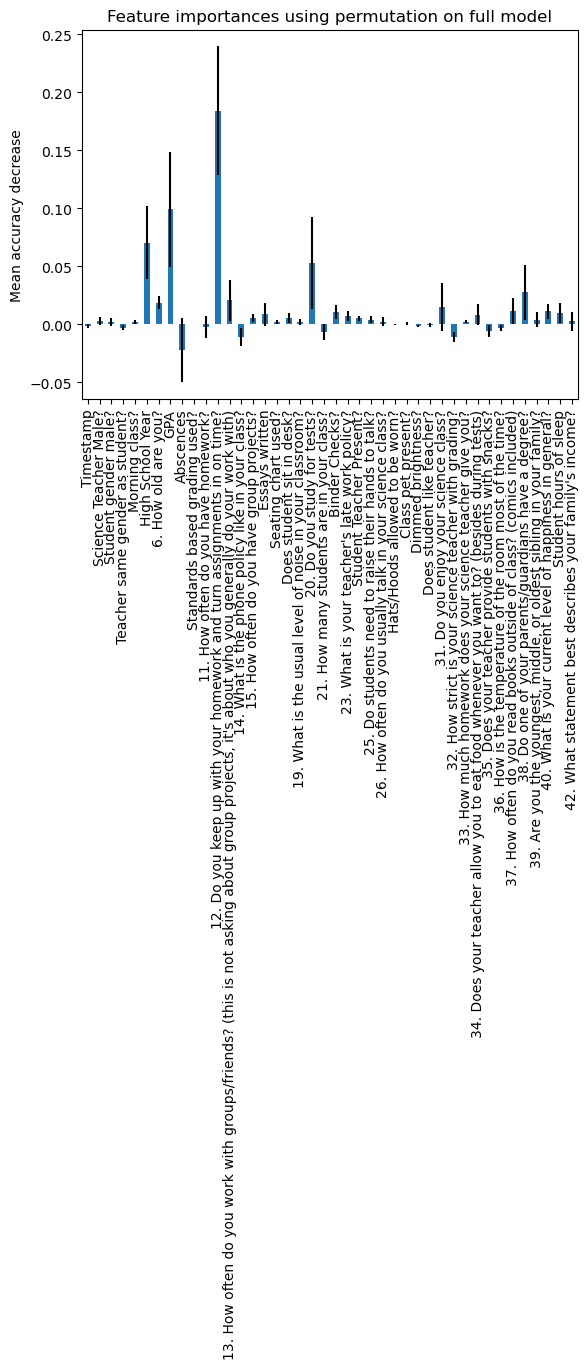

In [94]:
# plot important features
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

In [97]:
# print a list of grades predicted
np.floor(y_test_pred).tolist()

[70.0,
 86.0,
 91.0,
 61.0,
 73.0,
 84.0,
 85.0,
 86.0,
 56.0,
 78.0,
 88.0,
 59.0,
 82.0,
 73.0,
 81.0,
 77.0,
 66.0,
 79.0,
 81.0,
 75.0,
 81.0,
 78.0,
 71.0,
 87.0,
 64.0,
 65.0,
 79.0,
 81.0,
 69.0,
 66.0,
 81.0,
 82.0,
 71.0,
 81.0,
 80.0]

In [98]:
# print a list of the actual grades
y_test.values

array([57.81, 76.78, 90.66, 40.62, 82.28, 81.33, 84.49, 79.97, 85.87,
       85.93, 93.95, 38.33, 84.12, 47.58, 96.82, 90.  , 63.36, 79.54,
       93.37, 75.41, 69.72, 80.7 , 51.08, 84.58, 36.25, 37.5 , 87.27,
       92.5 , 71.87, 66.25, 89.69, 90.93, 85.83, 68.34, 63.31])

In [101]:
# print predicted and actual grades side by side
testLength = len(y_test)
for i in range(testLength):
    print('predicted grade: ', np.floor(y_test_pred[i]), 'actual grade: ', y_test.values[i])

predicted grade:  70.0 actual grade:  57.81
predicted grade:  86.0 actual grade:  76.78
predicted grade:  91.0 actual grade:  90.66
predicted grade:  61.0 actual grade:  40.62
predicted grade:  73.0 actual grade:  82.28
predicted grade:  84.0 actual grade:  81.33
predicted grade:  85.0 actual grade:  84.49
predicted grade:  86.0 actual grade:  79.97
predicted grade:  56.0 actual grade:  85.87
predicted grade:  78.0 actual grade:  85.93
predicted grade:  88.0 actual grade:  93.95
predicted grade:  59.0 actual grade:  38.33
predicted grade:  82.0 actual grade:  84.12
predicted grade:  73.0 actual grade:  47.58
predicted grade:  81.0 actual grade:  96.82
predicted grade:  77.0 actual grade:  90.0
predicted grade:  66.0 actual grade:  63.36
predicted grade:  79.0 actual grade:  79.54
predicted grade:  81.0 actual grade:  93.37
predicted grade:  75.0 actual grade:  75.41
predicted grade:  81.0 actual grade:  69.72
predicted grade:  78.0 actual grade:  80.7
predicted grade:  71.0 actual grad

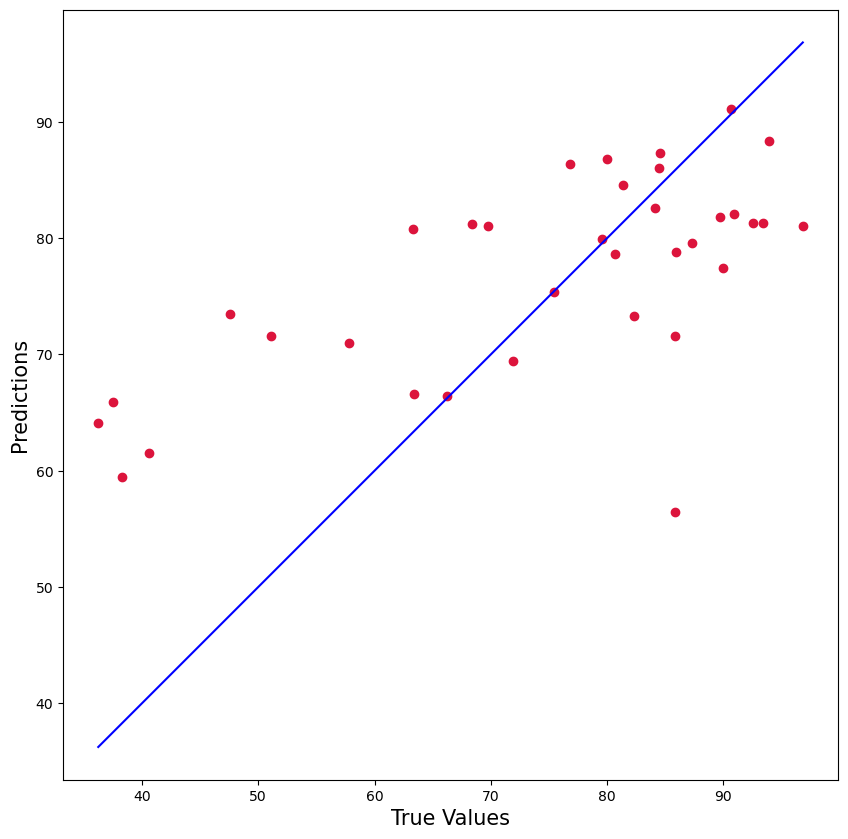

In [104]:
import pandas as pd
import matplotlib.pyplot as plt

best_pipe = grid.best_estimator_
y_test_pred = best_pipe.predict(X_test)


# plot from SOF https://stackoverflow.com/questions/58410187/how-to-plot-predicted-values-vs-the-true-value
plt.figure(figsize=(10,10))
plt.scatter(y_test, y_test_pred, c='crimson')
plt.yscale('linear')
plt.xscale('linear')

p1 = max(max(y_test_pred), max(y_test))
p2 = min(min(y_test_pred), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

In [77]:
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, mean_absolute_error, mean_squared_error

def TestPipe(y,y_pred):
    print('params:',grid.best_params_)
    # MSE
    print('MSE:',np.sqrt(mean_squared_error(y,y_pred)))
    # MAE
    print('MAE:',mean_absolute_error(y,y_pred))
    # MAPE
    # not using cause its missing in my python version
    #print('MAPE', mean_absolute_percentage_error(y,y_pred))

TestPipe(y_test,y_test_pred)

params: {}
MSE: 482.7003455591456
MAE: 93.42432285714285


AttributeError: 'RandomForestRegressor' object has no attribute 'tree_'

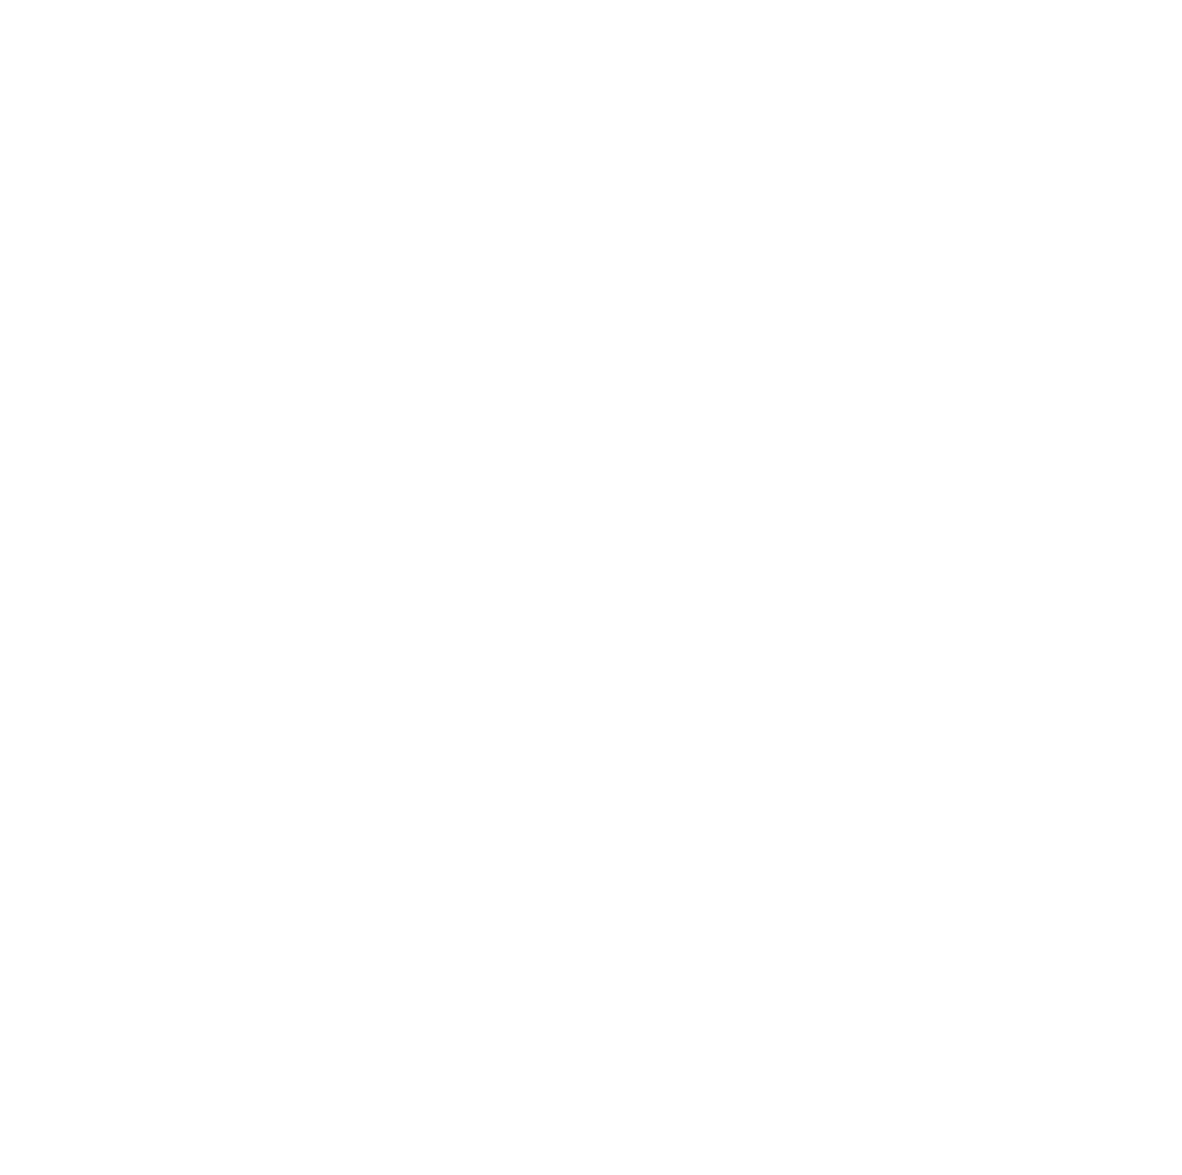

In [42]:
# DONT USDFS  XD
from sklearn.tree import plot_tree

plt.figure(figsize=(15,15))
plot_tree(best_pipe.named_steps['forest'],
         #feature_names = X_test.columns,
         #class_names = best_pipe.named_steps['forest'].classes_,
         filled = True,
         fontsize=15)
plt.show()